<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_14_2_Input_Gate_SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-5. Deep Learning 기초 : Multi Layer Perceptron (MLP)

>## [예제3-14] 2 Input Logic Gate (Logistic Regression)

>### Load modules

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
# Logistic regression : Logic Gate Truth Table
x_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# labels = np.array([[0], [0], [0], [1]])  # Gate : AND
# labels = np.array([[0], [1], [1], [1]])  # Gate : OR
# labels = np.array([[1], [1], [1], [0]])  # Gate : NAND
# labels = np.array([[1], [0], [0], [0]])  # Gate : NOR
labels = np.array([[0], [1], [1], [0]])  # Gate : XOR

> ### Placeholder

In [0]:
# placeholder
x_ph = tf.placeholder(tf.float32, (None, 2), name="input")
labels_ph = tf.placeholder(tf.float32, (None, 1), name="labels")

>## Hypothesis

In [0]:
# Weight, Bias
w = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32, name="weight")
b = tf.Variable(tf.random.normal((1, 1)), dtype=tf.float32, name="bias")

learning_rate = 0.01

# Hyoithesis, Cost, Optimizer
hypothesis = tf.sigmoid(tf.matmul(x_ph ,w) + b)
cost = -tf.reduce_mean(labels_ph * tf.log(hypothesis) + (1 - labels_ph) * tf.log(1 - hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


>### 학습 준비 과정

In [0]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

### 학습 (Training)

In [0]:
# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

check = np.array([0, 1000, 8000, 20000, 40000, N_training])
w_trained = []
b_trained = []
check_idx = 0

for cnt_training in range(1, N_training+1):
    _, cost_res, w_res, b_res = sess.run((train, cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
    cost_graph[cnt_training-1] = cost_res
    if check[check_idx] == cnt_training-1:
        w_trained.append(w_res)
        b_trained.append(b_res)
        check_idx += 1
    if cnt_training % 1000 == 1:
        print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(cnt_training-1, cost_graph[cnt_training-1], w_res[0][0], w_res[1][0], b_res[0][0]))

cost_res, w_res, b_res = sess.run((cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
cost_graph[N_training] = cost_res
print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(N_training, cost_graph[N_training], w_res[0][0], w_res[1][0], b_res[0][0]))
w_trained.append(w_res)
b_trained.append(b_res)

[    0] cost =     0.9901, w = [[0.08789] [-0.9247]], b = [[ -1.149]]
[ 1000] cost =     0.6991, w = [[ 0.3762] [-0.1948]], b = [[-0.1444]]
[ 2000] cost =     0.6949, w = [[ 0.2228] [-0.08347]], b = [[-0.08341]]
[ 3000] cost =     0.6937, w = [[ 0.1293] [-0.03478]], b = [[-0.05606]]
[ 4000] cost =     0.6933, w = [[0.07582] [-0.01198]], b = [[-0.03786]]
[ 5000] cost =     0.6932, w = [[0.04505] [-0.001937]], b = [[-0.02557]]
[ 6000] cost =     0.6932, w = [[0.02714] [0.001988]], b = [[-0.01727]]
[ 7000] cost =     0.6932, w = [[0.01656] [0.003106]], b = [[-0.01167]]
[ 8000] cost =     0.6932, w = [[0.01024] [0.003042]], b = [[-0.00788]]
[ 9000] cost =     0.6931, w = [[0.006414] [0.00256]], b = [[-0.005322]]
[10000] cost =     0.6931, w = [[0.004062] [0.001999]], b = [[-0.003595]]
[11000] cost =     0.6931, w = [[0.002599] [0.001495]], b = [[-0.002428]]
[12000] cost =     0.6931, w = [[0.001678] [0.001087]], b = [[-0.00164]]
[13000] cost =     0.6931, w = [[0.001092] [0.0007759]], b = 

>### Training Test

In [0]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = sess.run(hypothesis, feed_dict={x_ph:x_input})
y = y.reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [0 0] , Target : [0] => Y : 0(y:  0.5)
Input [0 1] , Target : [1] => Y : 0(y:  0.5)
Input [1 0] , Target : [1] => Y : 0(y:  0.5)
Input [1 1] , Target : [0] => Y : 0(y:  0.5)


> ### Ploting : Cost/Training Count

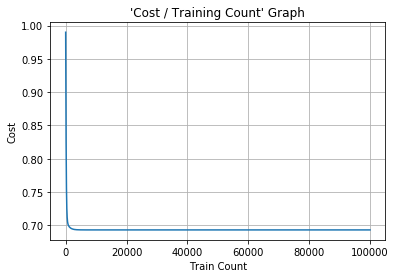

In [0]:
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)

> ### Decesion boundary

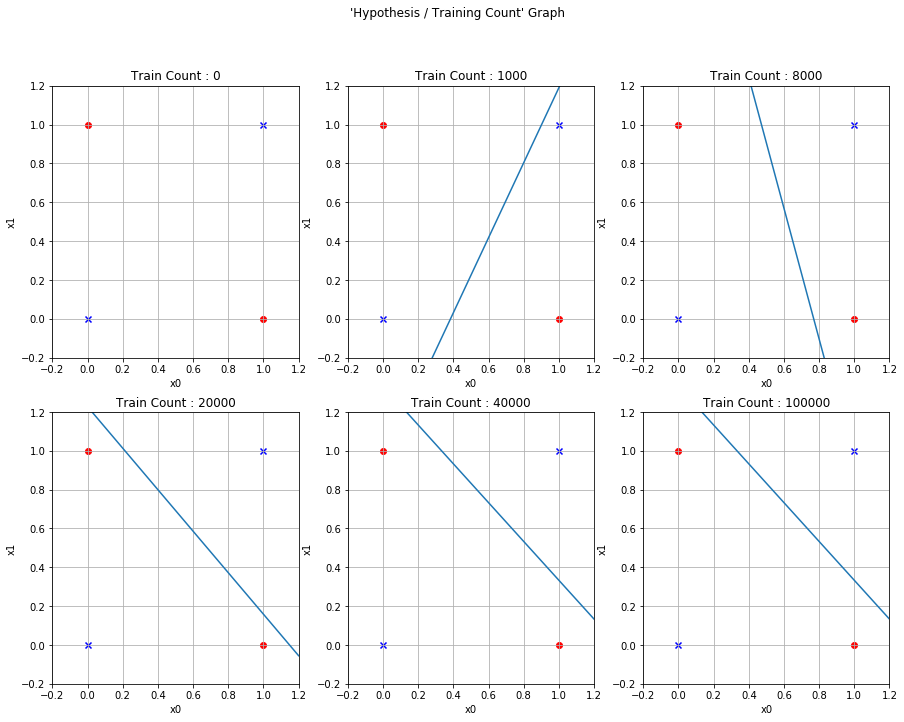

In [0]:
x_hypo = np.linspace(-0.2, 1.2, 1000)
x_col_0 = [x_input[idx][0] for idx in range(len(labels)) if labels[idx][0] == 0]
x_row_0 = [x_input[idx][1] for idx in range(len(labels)) if labels[idx][0] == 0]
x_col_1 = [x_input[idx][0] for idx in range(len(labels)) if labels[idx][0] == 1]
x_row_1 = [x_input[idx][1] for idx in range(len(labels)) if labels[idx][0] == 1]

fig_hypothesis, ax_hypothesis = plt.subplots(2, 3, figsize=(15, 11))
fig_hypothesis.suptitle("'Hypothesis / Training Count' Graph")
for ax_idx in range(check.size):
    w = w_trained[ax_idx]
    b = b_trained[ax_idx]
    y_hypo = -(w[0][0] * x_hypo + b[0][0])/w[1][0] 
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col_0, x_row_0, color='blue', marker="x")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col_1, x_row_1, color='red', marker="o")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_hypo, y_hypo, label='hypothesis')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_title("Train Count : {}".format(check[ax_idx]))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlim((-0.2, 1.2))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylim((-0.2, 1.2))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].grid(True)

plt.show()